# Análisis de Componentes Principales (PCA) para un conjunto de datos de estrellas

## Paso 1: Importar las librerías necesarias

In [1]:

# Asegúrate de tener instaladas las librerías necesarias. Puedes instalarlas utilizando pip si aún no las tienes:

# %pip install matplotlib seaborn pandas numpy scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Paso 2: Leer el archivo CSV y explorar los datos

In [2]:

# Leer el archivo CSV
data = pd.read_csv('estrella.csv')

# Mostrar las primeras filas del DataFrame
data.head()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


## Paso 3: Preprocesamiento de los datos

In [3]:

# Seleccionar las columnas numéricas que serán usadas para PCA
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
x = data[features].values

# Estandarizar los datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


## Paso 4: Aplicar PCA

In [4]:

# Inicializar PCA con el número de componentes deseado (por ejemplo, 2 componentes principales)
pca = PCA(n_components=2)

# Ajustar PCA a los datos escalados
principal_components = pca.fit_transform(x_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir las otras columnas para referencia
final_df = pd.concat([pca_df, data[['Star type', 'Star color', 'Spectral Class']]], axis=1)

# Mostrar las primeras filas del nuevo DataFrame
final_df.head()


,PC1,PC2,Star type,Star color,Spectral Class
0,1.476090,-0.343211,0,Red,M
1,1.503654,-0.343857,0,Red,M
2,1.636288,-0.374996,0,Red,M
3,1.515309,-0.364557,0,Red,M
4,1.735919,-0.427500,0,Red,M


## Paso 5: Visualizar los resultados

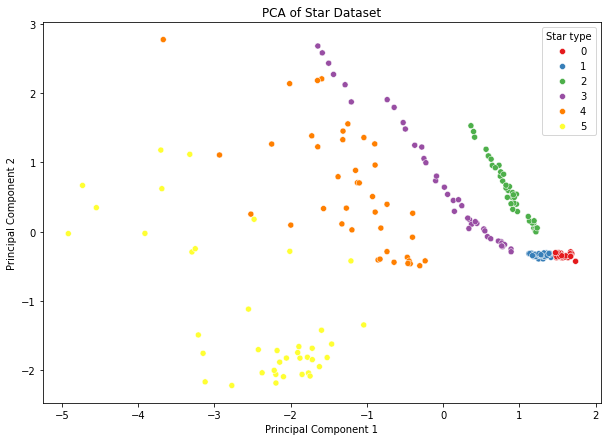

In [5]:

# Visualizar los componentes principales con un scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Star type', data=final_df, palette='Set1')

plt.title('PCA of Star Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Paso 6: Interpretar los resultados


Los componentes principales (PC1 y PC2) son combinaciones lineales de las variables originales que capturan la mayor cantidad de varianza posible. El scatter plot te dará una idea de cómo se agrupan los diferentes tipos de estrellas según los componentes principales.
